# Glassdoor Reviews Data Visualization

### Jonah Woods and Darshan Tina

In [1]:
import pandas as pd
data = pd.read_csv('data/employee_reviews.csv')
#Fixes formatting issue
advice = data['advice-to-mgmt']
advice = advice[advice!='none'].astype('U')
data['advice-to-mgmt'] = advice

advice = data['advice-to-mgmt']
advice = advice[advice!='none'].astype('U')
data['advice-to-mgmt'] = advice

data.shape

(67529, 17)

In [2]:
review_data = data.drop('Unnamed: 0',axis=1)
review_data.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,nan,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


## 1) Ratings for Each Company

Question: Who are the best companies to work for?

### A. Overall Ratings

In [3]:
company_unique = set(review_data['company'])
company_by_rating = review_data.groupby('company')['overall-ratings'].mean()
company_by_rating.sort_values(inplace=True, ascending=False)
company_by_rating

company
facebook     4.511950
google       4.339430
apple        3.958224
microsoft    3.816564
amazon       3.587363
netflix      3.411111
Name: overall-ratings, dtype: float64

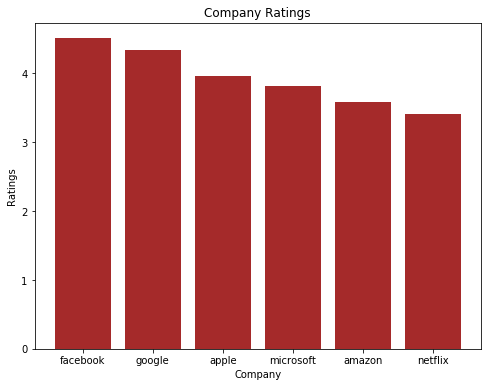

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,6))
plt.bar(company_by_rating.index,company_by_rating.values,color='brown')
plt.xlabel('Company')
plt.ylabel('Ratings')
plt.title('Company Ratings')
plt.show()

### B. Various Metric Ratings

In [6]:
# data.loc[:,['company','overall-ratings', 'work-balance-stars',
#        'culture-values-stars', 'carrer-opportunities-stars',
#        'comp-benefit-stars', 'senior-mangemnet-stars','job-title']]

#Fix formatting issues
review_data['carrer-opportunities-stars']=pd.to_numeric(review_data['carrer-opportunities-stars'],errors='coerce')
review_data['overall-ratings'] = pd.to_numeric(review_data['overall-ratings'],errors='coerce')
review_data['work-balance-stars'] = pd.to_numeric(review_data['work-balance-stars'],errors='coerce')
review_data['culture-values-stars'] = pd.to_numeric(review_data['culture-values-stars'],errors='coerce')
review_data['comp-benefit-stars'] = pd.to_numeric(review_data['comp-benefit-stars'],errors='coerce')
review_data['senior-mangemnet-stars'] = pd.to_numeric(review_data['senior-mangemnet-stars'],errors='coerce')

#Used in Tableau to create 
review_data.to_csv('data/career_data.csv')

review_data.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,nan,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


## 2) Ratings by Location

Question: Where are the best places to work?

In [7]:
def state(x):
    a,b,*c = x.strip().split(',')
    return 'USA:'+str(b).strip()

In [8]:
def country(x):
    *a,b = x.strip().split('(')
    return b[:-1].upper()

In [9]:
def country_or_state(location):
    '''Given a location output the correct formatting

    Keyword arguments:
    location - locations with a '(' get converted to countries
             - locations with a ',' get converted to states
    '''
    if '(' in location:
        return country(location)
    elif ',' in location:
        return state(location)
    else:
        return location

In [10]:
#Remove reviews without a location
clean_location_df = review_data[review_data['location'] != 'none']

#Create new column (cleaned_location) with cleaned country/state values
clean_location_df=clean_location_df.assign(cleaned_location=clean_location_df['location'].apply(country_or_state))
clean_location_df.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,cleaned_location
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...,USA:CA
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...,USA:NY
3,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...,USA:CA
4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...,USA:CA
5,google,"Mountain View, CA","Dec 9, 2018",Former Employee - SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,nan,5.0,4.0,4.0,4.0,5.0,4.0,1,https://www.glassdoor.com/Reviews/Google-Revie...,USA:CA


In [11]:
def state_and_country_df(clean_loc_df, loc_as_index=False):
    '''Generates two dataframes (state_df, country_df) for either US states or countries
    
    Keyword arguments:
    clean_loc_df - dataframe with cleaned locations
    loc_as_index - true if location is the index, false if location is a column
    '''
    
    if loc_as_index: 
        values = clean_loc_df.index
    else:
        values = clean_loc_df['cleaned_location']
        
    #Create DataFrame for states
    state_mask = values.str[:3]=='USA'
    state_df = clean_loc_df[state_mask]

    #The rest of the dataframe is countries
    country_df = clean_loc_df.loc[~state_mask].copy()
    
    if loc_as_index:
        #Put USA average rating and count in countries dataframe
        usa_avg = state_df['overall-ratings'].mean()
        usa_cnt = len(state_df)
        country_df.loc['USA'] = [usa_cnt, usa_avg]
    
    return (state_df, country_df)

### A. State Ratings

In [12]:
state_df, country_df = state_and_country_df(clean_location_df)
#Group up locations in state dataframe
state_location_groups = state_df.groupby('cleaned_location')

#Gather only locations with more than 10 reviews
review_counts = state_location_groups.count()['dates'].sort_values(ascending=False)
mask = (review_counts >= 10).sort_index()
highly_reviewed_states = state_location_groups.mean()[mask]
highly_reviewed_states.sort_values('overall-ratings', inplace=True, ascending=False)
highly_reviewed_states.head()

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count
cleaned_location,,,,,,,
USA:MS,4.727273,4.181818,4.500000,3.909091,4.136364,3.909091,0.272727
USA:AR,4.388889,3.777778,4.388889,4.000000,4.333333,3.833333,0.500000
USA:HI,4.214286,3.944444,4.083333,3.629630,4.185185,3.611111,0.428571
USA:NH,4.189189,3.375000,4.310345,3.680556,4.222222,3.930556,0.459459
USA:IA,4.181818,3.000000,3.555556,3.800000,4.750000,3.950000,1.636364


In [13]:
#Get data for state tableau graph
states_ratings = highly_reviewed_states[['overall-ratings']]
states_ratings.index.set_names(['state'], inplace=True)

#Used in tableau to create state map
states_ratings.to_csv('data/StateTest_data.csv')

It is interesting that Mississippi and Arkansas are the top two states. What companies contribute to the high ratings?

In [14]:
for state in highly_reviewed_states.index[:6]:
    print(state)
    print(clean_location_df[clean_location_df['cleaned_location']==state]['company'].value_counts())

USA:MS
apple       8
facebook    1
amazon      1
google      1
Name: company, dtype: int64
USA:AR
apple        9
microsoft    3
amazon       3
google       2
facebook     1
Name: company, dtype: int64
USA:HI
apple        26
microsoft     1
google        1
Name: company, dtype: int64
USA:NH
apple        27
amazon        7
microsoft     3
Name: company, dtype: int64
USA:IA
microsoft    4
apple        3
google       2
facebook     1
amazon       1
Name: company, dtype: int64
USA:AL
apple        19
amazon        5
microsoft     5
Name: company, dtype: int64


Apple seems to dominate the US top locations.

### B. Country Ratings

In [15]:
#Create dataframe for count and average overall-rating for a country
country_groups = country_df.groupby('cleaned_location')
country_cnt = country_groups.count()['dates']
country_avg = country_groups.mean()['overall-ratings']

#Combine the above columns
country_cnt_avg = pd.concat([country_cnt, country_avg], axis=1)
country_cnt_avg.rename(index=str, inplace=True, columns={"dates": "count"})

#Put USA average rating and count in countries dataframe
usa_avg = state_df['overall-ratings'].mean()
usa_cnt = len(state_df)
country_cnt_avg.loc['USA'] = [usa_cnt, usa_avg]

#Only keep countries with more than 20 ratings
country_cnt_avg = country_cnt_avg[country_cnt_avg['count']>20]
country_cnt_avg

,count,overall-ratings
cleaned_location,,
ARGENTINA,27.0,4.148148
AUSTRALIA,290.0,3.851724
BRAZIL,160.0,4.281250
CANADA,710.0,3.791549
CHINA,319.0,4.115987
COSTA RICA,149.0,4.328859
CZECH REPUBLIC,96.0,3.156250
DENMARK,28.0,4.000000
EGYPT,50.0,4.060000


In [16]:
country_cnt_avg.sort_values('overall-ratings', inplace=True, ascending=False)
country_cnt_avg['rank'] = ['#'+str(i) for i in range(1, len(country_cnt_avg)+1)]
top_5_countries = country_cnt_avg[:5]

#Used in Tableau to create the country map
top_5_countries.to_csv('data/top_5_countries.csv')
top_5_countries

,count,overall-ratings,rank
cleaned_location,,,
COSTA RICA,149.0,4.328859,#1
TAIWAN,29.0,4.310345,#2
ISRAEL,103.0,4.281553,#3
BRAZIL,160.0,4.281250,#4
SWEDEN,26.0,4.230769,#5


Again, it is interesting that these are the top countries. What companies contribute to each?

In [17]:
for country in country_cnt_avg.index[:5]:
    print(country)
    print(clean_location_df[clean_location_df['cleaned_location']==country]['company'].value_counts())

COSTA RICA
amazon       143
microsoft      5
google         1
Name: company, dtype: int64
TAIWAN
google       13
microsoft    12
apple         4
Name: company, dtype: int64
ISRAEL
microsoft    58
amazon       15
google       14
facebook     10
apple         6
Name: company, dtype: int64
BRAZIL
microsoft    85
amazon       30
google       29
facebook     12
apple         4
Name: company, dtype: int64
SWEDEN
microsoft    17
google        6
amazon        2
apple         1
Name: company, dtype: int64


Amazon does very well in Costa Rica, but Microsoft does better in Israel and Brazil.

### C. Company Ratings by Location

In [18]:
def count_and_avg_for_company(clean_df, company):
    '''Calculates the number of ratings and average rating for each location of a company.
    
    Groups US states and countries together
    Only count the locations with more than 10 ratings.
    Returns a dataframe with count and average of ratings per location
        
    Keyword arguments:
    clean_df -- df with a "cleaned_location" column
    company -- name of company as a string
    '''
    
    cmp = clean_df[clean_df['company']==company]
    location_groups = cmp.groupby('cleaned_location')

    #Find number of ratings and the average rating for all locations
    all_loc_cnts_cmp = location_groups.count()['dates']
    all_loc_avg_cmp = location_groups.mean()['overall-ratings']
    all_loc_cnts_cmp.name = 'count'

    #Return a dataframe with the count and mean for all locations
    loc_df_cmp = pd.concat([all_loc_cnts_cmp, all_loc_avg_cmp], axis=1)
    loc_df_cmp.sort_values('overall-ratings', ascending = False)
    return loc_df_cmp

In [19]:
def compute_z_scores(series):
    return (series-series.mean())/series.std()

In [20]:
def get_colors(start, end, num_divisions):
    '''Get color map between two colors
    
    Keyword arguments:
    start/end -- starting/ending color in format #123bef
    num_divisions -- number of colors to return in between start/end
    '''
    
    r_start = int(start[1:3], 16)
    g_start = int(start[3:5], 16)
    b_start = int(start[5:7], 16)
    
    r_width = int(end[1:3], 16) - r_start
    g_width = int(end[3:5], 16) - g_start
    b_width = int(end[5:7], 16) - b_start
    
    r_increment = r_width/(num_divisions-1)
    g_increment = g_width/(num_divisions-1)
    b_increment = b_width/(num_divisions-1)
    
    def hex_color(i):
        r = str(hex(r_start+int(r_increment*i)))[2:]
        g = str(hex(g_start+int(g_increment*i)))[2:]
        b = str(hex(b_start+int(b_increment*i)))[2:]
        return '#'+r+g+b
    
    return [hex_color(i) for i in range(num_divisions)]    

In [21]:
from operator import itemgetter
def state_and_country_plots(state_df, country_df):
    '''Displays two plots by average rating: a US plot and an all countries plot
    
    Keyword arguments:
    state_df -- DataFrame of state count, means used in the plot
    country_df -- DataFrame of country count, means used in the plot
    '''
    
    states = state_df['overall-ratings'].sort_values(ascending=True)
    countries = country_df['overall-ratings'].sort_values(ascending=True)

    state_z_scores = compute_z_scores(states)
    country_z_scores = compute_z_scores(countries)
    color1 = '#2b3252'
    color2 = '#ef5410'
#     color1 = '#141A46'
#     color2 = '#EC8A5E'
    
    if len(state_z_scores) > 1:
        plt.figure(figsize=(1/3*len(state_z_scores), 1/3*len(state_z_scores)))
        plt.title('State Rankings')
        plt.ylabel('States')
        plt.xlabel('z-Score')
        plt.barh(state_z_scores.index, state_z_scores, color=get_colors(color1, color2, len(states)))
        plt.show()
        
    if len(country_z_scores) > 1:
        plt.figure(figsize=(1/3*len(country_z_scores), 1/2.5*len(country_z_scores)))
        plt.title('Country Rankings')
        plt.ylabel('States')
        plt.xlabel('z-Score')
        plt.barh(country_z_scores.index, country_z_scores, color=get_colors(color1, color2, len(countries)))
    
    plt.show()

apple


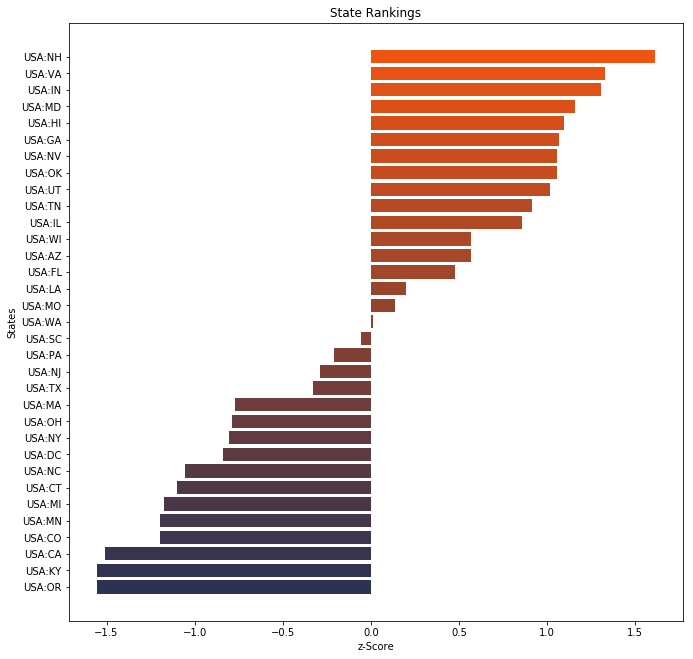

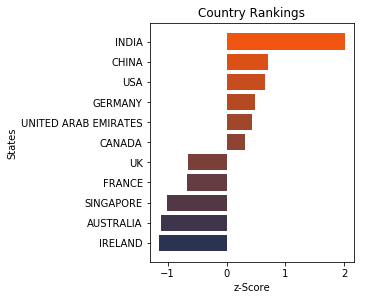

google


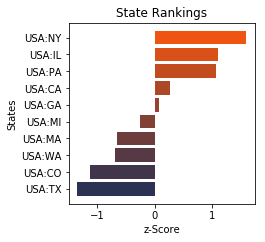

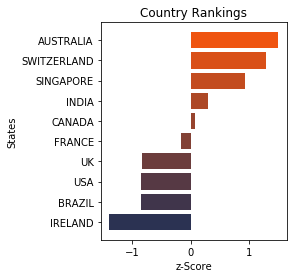

amazon


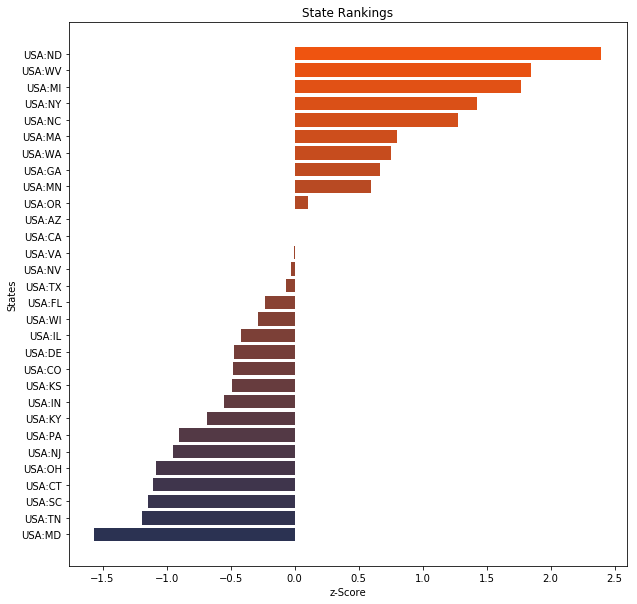

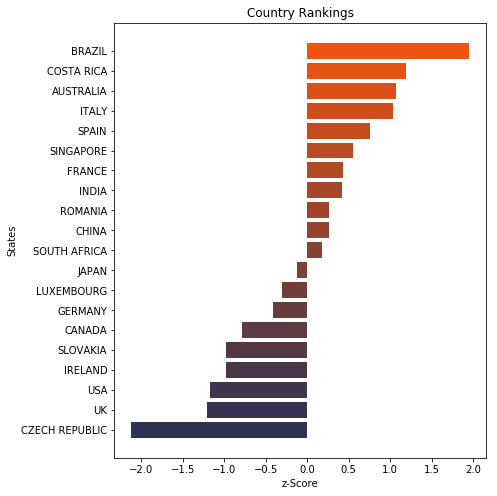

facebook


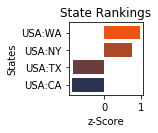

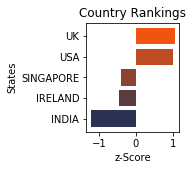

microsoft


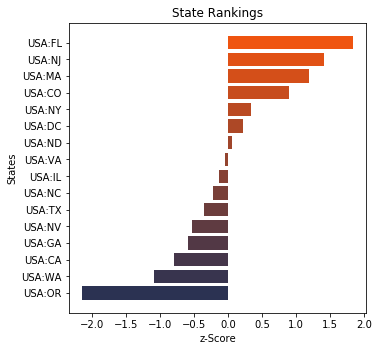

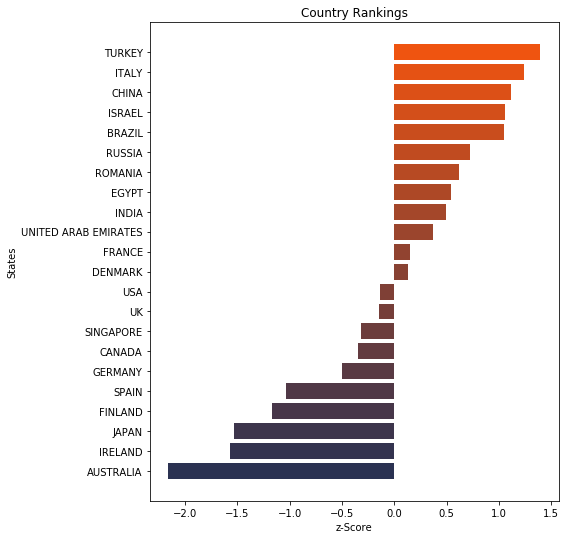

In [22]:
# Not enough data for a good visualization for Netflix
for company in set(review_data[review_data['company']!='netflix']['company']):
    print(company)
    
    cmp_df = count_and_avg_for_company(clean_location_df, company)
    
    #Only include locations with more than 20 ratings
    loc_ten_ratings = cmp_df[cmp_df['count'] > 20]
    state_df, country_df = state_and_country_df(loc_ten_ratings, True)
    state_and_country_plots(state_df, country_df)

#### Case Study 1: Amazon in North Dakota

Why is USA:ND ranked so highly for Amazon?

In [23]:
df = clean_location_df[clean_location_df['cleaned_location']=='USA:ND']
df2 = df[df['company']=='amazon'].copy()
print(len(df2))

27


There seems to be plenty of reviews so upon further research, Amazon sent many of their employees to work from home in 2018. This may have resulted in some higher reviews for 2018.

In [24]:
from datetime import datetime
df2['datetimes'] = df2.apply(lambda s: datetime.strptime(s['dates'].strip(), '%b %d, %Y'), 1)
# display(df2.sort_values('datetimes', ascending=False)[['overall-ratings','location','datetimes']])
all_other_ratings = df2[df2['datetimes']<='2018-01-01']['overall-ratings'].mean()
rating_2018 = df2[df2['datetimes']>'2018-01-01']['overall-ratings'].mean()
print('Prior to 2018: '+str(all_other_ratings))
print('During 2018: '+str(rating_2018))

Prior to 2018: 3.7142857142857144
During 2018: 4.666666666666667


In fact, the reviews were much better during 2018, and may be part of the reason the ratings are so high for this state.

In [25]:
df2['overall-ratings'].mean()

3.925925925925926

Also, as we saw before, Amazon had pretty low ratings in the US compared to other countries. The overall rating of Amazon in ND was only 3.93 so the bar was fairly low for state ratings.

#### Case Study 2: Facebook Highest Ratings

Why does Facebook have the highest ratings? Facebook has a higher rating than Google, maybe there are an inadeaquate number of reviews.

In [26]:
face = clean_location_df[clean_location_df['company']=='facebook']
f = len(face)
g = len(clean_location_df[clean_location_df['company']=='google'])
print('Facebook: '+str(f))
print('Google: '+str(g))

Facebook: 1590
Google: 4158


It seems like there are plenty reviews of both companies, but maybe facebook's reviews are limited in some way.

In [27]:
loc_counts = face['cleaned_location'].value_counts()
loc_counts

USA:CA                  984
IRELAND                 113
USA:WA                   91
UK                       91
USA:NY                   84
USA:TX                   49
INDIA                    32
SINGAPORE                22
USA:IL                   12
BRAZIL                   12
ISRAEL                   10
USA:MA                    9
USA:DC                    6
ARGENTINA                 6
CANADA                    6
PHILIPPINES               4
BANGLADESH                4
FRANCE                    3
AUSTRALIA                 3
USA:VA                    2
PAKISTAN                  2
NETHERLANDS               2
SPAIN                     2
HONG KONG                 2
USA:FL                    2
USA:OH                    2
IRAN                      2
NIGERIA                   2
USA:NJ                    2
UNITED ARAB EMIRATES      2
USA:NC                    2
MOROCCO                   1
EGYPT                     1
TUNISIA                   1
QATAR                     1
USA:OR              

In [28]:

loc_counts[0]/sum(loc_counts)

0.6188679245283019

In [29]:
ca = face[face['cleaned_location']=='USA:CA'].mean()['overall-ratings']
ireland = face[face['cleaned_location']=='IRELAND'].mean()['overall-ratings']
india = face[face['cleaned_location']=='INDIA'].mean()['overall-ratings']
print('USA:CA: '+str(ca))
print('IRELAND: '+str(ireland))
print('INDIA: '+str(india))

USA:CA: 4.5060975609756095
IRELAND: 4.353982300884955
INDIA: 4.21875


It seems like their offices in California are doing great, but Ireland and India have slightly lower ratings. Facebook is the overall best company, but it seems as though they are limited to their USA:CA office in some way because 61% of their reviews come from this location. It would be interesting to see this number change as facebook grows globally, and as they continue to struggle with the "content moderator" position.

#### Case Study 3: Microsoft in Washington

Microsoft dominates in Isreal and Brazil (two of the highest rated countries to work in), but we see here that it struggles back in the states. It is interesting to see that the second worst reviews are coming from its own home state (USA:WA - Washington).

In [30]:
mask = (clean_location_df['company']=='microsoft') & (clean_location_df['cleaned_location']=='USA:WA')
washington_reviews = clean_location_df[mask]
redmond_reviews = washington_reviews[washington_reviews['location']=='Redmond, WA']
other_reviews = washington_reviews[washington_reviews['location']!='Redmond, WA']
len(redmond_reviews)/len(washington_reviews)

0.8066234701223902

In [31]:
redmond_reviews['overall-ratings'].mean()

3.649589432345591

In [32]:
other_reviews['overall-ratings'].mean()

3.768428890543559

In fact, 80% of the reviews in Washington are from its headquarters in Redmond, and those reviews are a little worse on average than the rest of Washington. Regardless, Microsoft struggles in its home state.

## 3) Pros, Cons, Advice Analysis

Goal: Analyze these three sections using a bag of words model with the help of CountVectorizer from sklearn.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from operator import itemgetter
def print_freq_table(entries, prnt=True, num_top_words=40,ngram=(1,2)):
    '''Prints out the frequency table for all words in the given entries.
    
    Uses CountVectorizer from sklearn.
    Eliminates words included in more than 90% of entries.
    Eliminates words included in less than 10 entries.
    Removes stop_words from the CountVectorizer dictionary.
    
    Keyword arguments:
    entries -- the entries to fit CountVectorizer on
    num_top_words -- number of top words to display in frequency table
    '''

    vectorizer = CountVectorizer(min_df=10, max_df=.9, stop_words="english", ngram_range=ngram)
    bag_of_words = vectorizer.fit_transform(entries)
    sum_of_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_of_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    sorted_list = sorted(words_freq, reverse = True, key=itemgetter(1))
    
    if prnt:
        print('Rank'.ljust(10), 'Lemma'.ljust(20), 'Raw Count')
        for i in range(num_top_words):
            if(i >= len(sorted_list)): break
            print(str(i+1).ljust(10), sorted_list[i][0].ljust(20), sorted_list[i][1])
        
    return sorted_list

In [34]:
def word_chart_for_column(col_name, prnt=True, num_top_words=40, ngram=(2,2)):
    '''Return Bag of words model for each company for given column
    
    Keyword arguments:
    col_name -- "pros" or "cons"
    prnt -- True or false for printing out freq tables
    num_top_words -- top words to display
    ngram -- ngram range for count vectorizer
    '''
    companies = set(data['company'])
    words_company = {}
    for company in companies:
        if prnt:
            print(f'\nCompany {col_name}: '+company.title())
        entries = data[data['company']==company][col_name]
        test_data = print_freq_table(entries, prnt, num_top_words, ngram)
        words_company[company.title()]=test_data
    return words_company

In [35]:
def top_words(column, num_words, companies):
    '''Returns most frequent words in pros, cons, or advice-to-mgmt col for given companies
    
    Keyword arguments:
    column -- pros, cons, or advice-to-mgmt
    num_words -- number of words to include in list
    companies -- a list of companies to include in ouput list
    '''
    
    pros = word_chart_for_column(column, False, ngram=(1,2)).items()
    company_pros = pd.DataFrame([(company, word) for company, words in pros 
                                                         for word, count in words])
    word_col = column+' word'
    count_col = column+' count'
    company_pros.columns = ['company', 'word']
    
    #Get words that only occur for that company
    unique_words = company_pros[company_pros.groupby('word').word.transform(len) == 1].copy()
    unique_words.rename(columns={'word': word_col}, inplace=True)
    
    #Join lists together for each company
    dfs = []
    for company in companies:
        df = unique_words[unique_words['company']==company][:num_words]
        company_num_words = len(df)
        df['rank'] = list(range(1, company_num_words+1))
        dfs.append(df)
        
    return pd.concat(dfs)

## A. Top Three Unique Words in Pros, Cons, Advice

In [36]:
cols = ['pros', 'cons', 'advice-to-mgmt']
companies = ['Google', 'Amazon', 'Facebook']
num_words = 3
all_top_words = [top_words(col, num_words, companies) for col in cols]

In [37]:
print('Pros')
display(all_top_words[0])
print('Cons')
display(all_top_words[1])
print('Advice')
display(all_top_words[2])

Pros


,company,pros word,rank
3268,Google,working google,1
3300,Google,work google,2
3324,Google,google great,3
4850,Amazon,principles,1
4876,Amazon,leadership principles,2
4950,Amazon,working amazon,3
9940,Facebook,fb,1
10062,Facebook,billion people,2
10132,Facebook,working facebook,3


Cons


,company,cons word,rank
3964,Google,working google,1
4085,Google,google big,2
4087,Google,googlers,3
5548,Amazon,associates,1
5565,Amazon,warehouse,2
5679,Amazon,frugality,3
11979,Facebook,menlo,1
11988,Facebook,menlo park,2
12153,Facebook,mpk,3


Advice


,company,advice-to-mgmt word,rank
1909,Google,googlers,1
1985,Google,evil,2
2065,Google,googley,3
2635,Amazon,associate,1
2643,Amazon,leadership principles,2
2658,Amazon,warehouse,3
5442,Facebook,company grows,1
5473,Facebook,fb,2


In [38]:
from functools import reduce

df_final = reduce(lambda left,right: pd.merge(left,right,how='outer',on=['company', 'rank']), all_top_words)

In [39]:
df_final[['rank', 'company', 'pros word', 'cons word', 'advice-to-mgmt word']].to_csv('data/word_ranks.csv')

## B. Wordcloud Visualizations

In [40]:
from wordcloud import WordCloud

In [41]:
def word_plot(company, col_data):
    '''Word plot for company with word_chart_for_col
    
    Keyword arguments:
    company -- as given
    col_data -- return value of word_chart_for_col
    '''
    cmp_data = [k.replace(' ','') for k,v in col_data[company]]
    cmp_corp = ' '.join(cmp_data)

    wc = WordCloud(width = 800, height = 800, 
                    background_color ='white',  
                    min_font_size = 10).generate(cmp_corp)

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wc) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

Apple
Pros


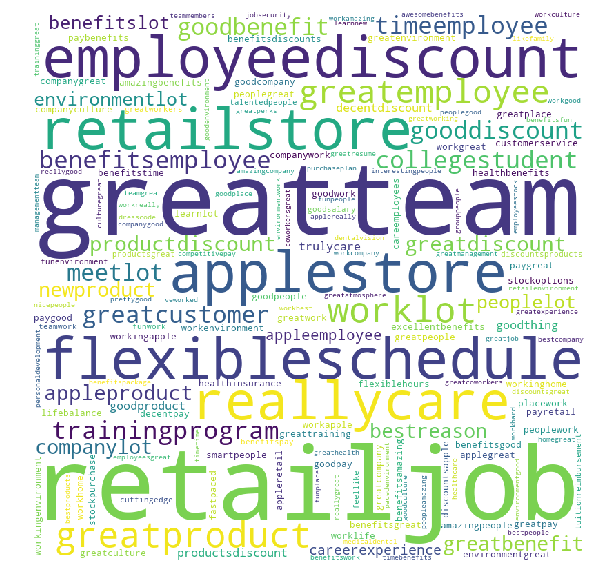

Cons


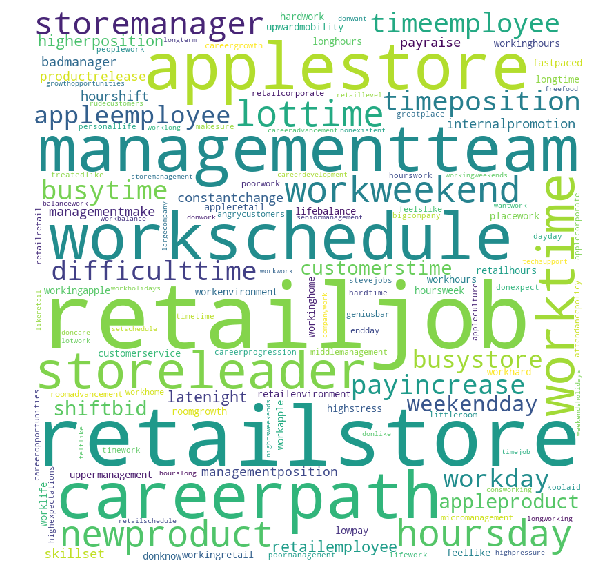

Advice to management


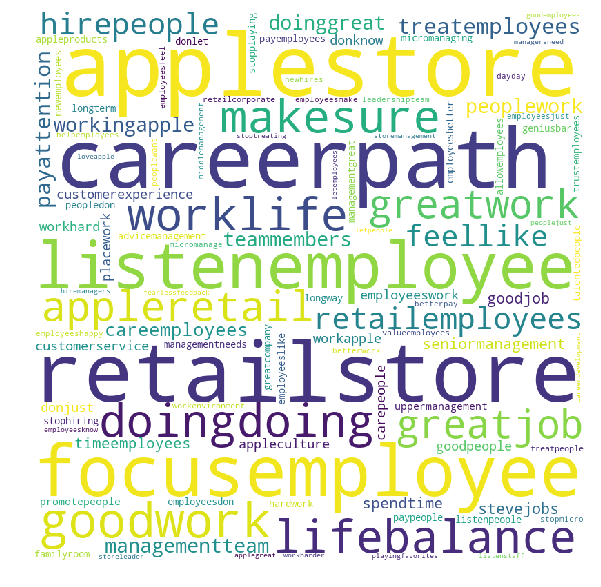

Netflix
Pros


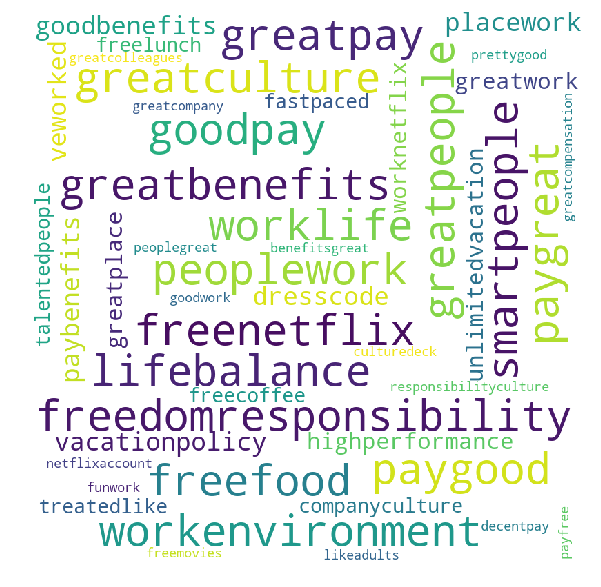

Cons


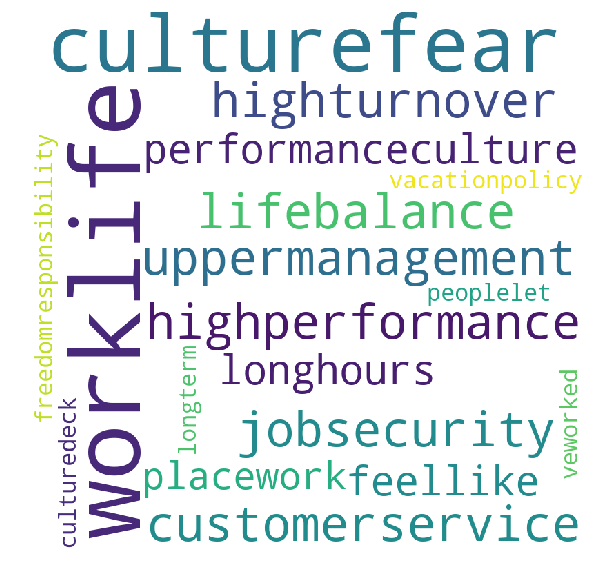

Advice to management


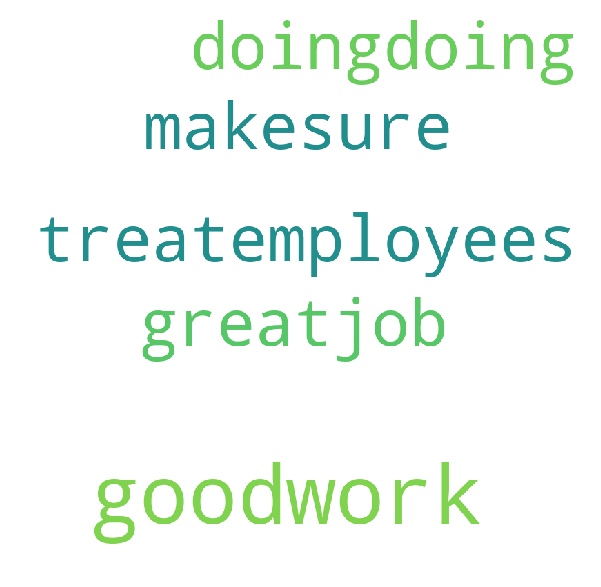

Google
Pros


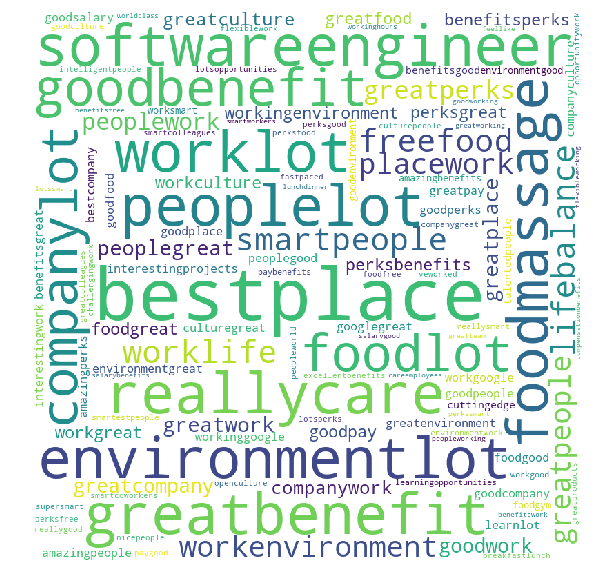

Cons


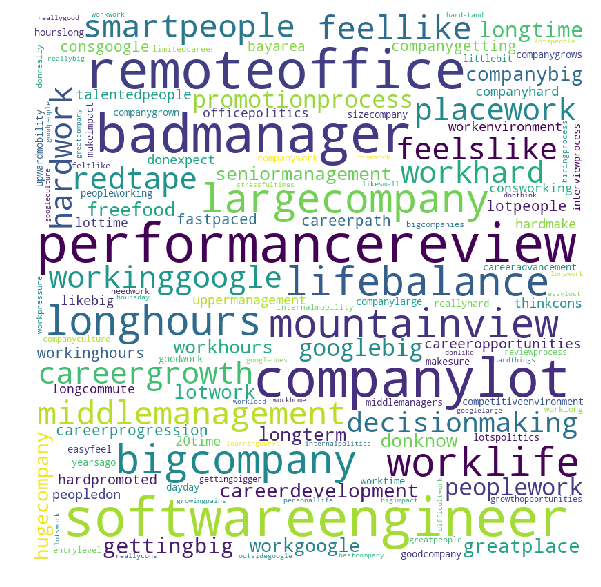

Advice to management


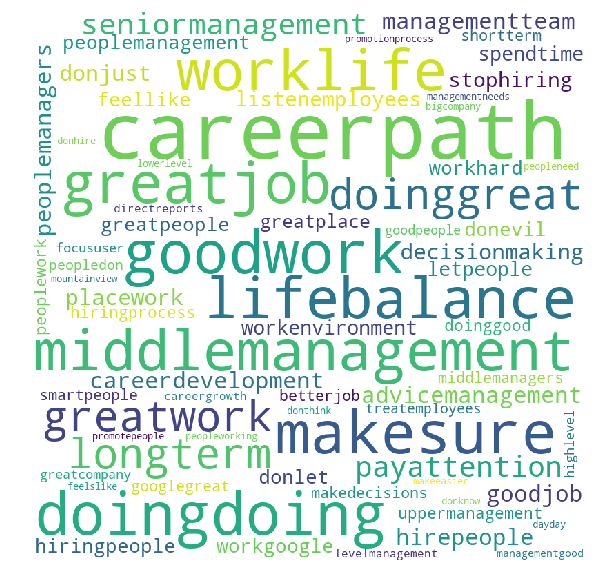

Amazon
Pros


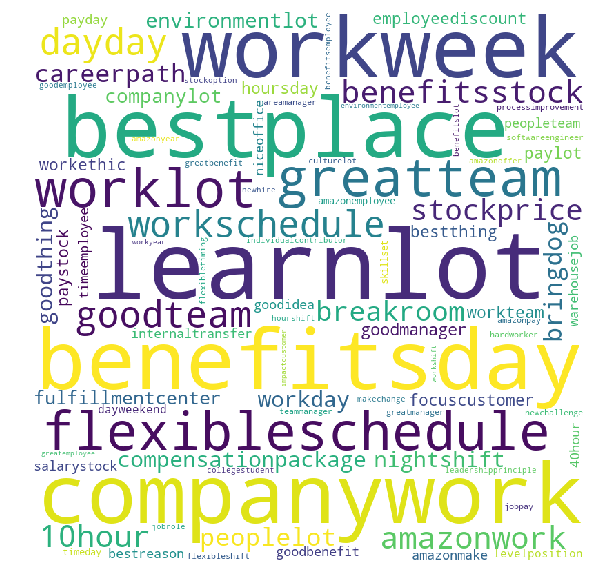

Cons


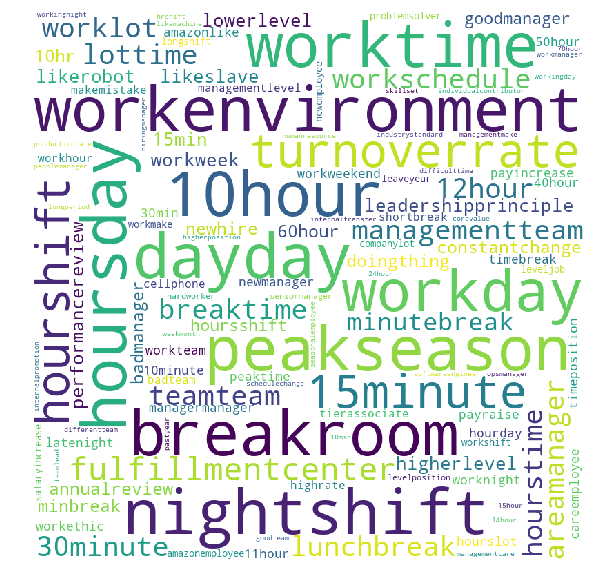

Advice to management


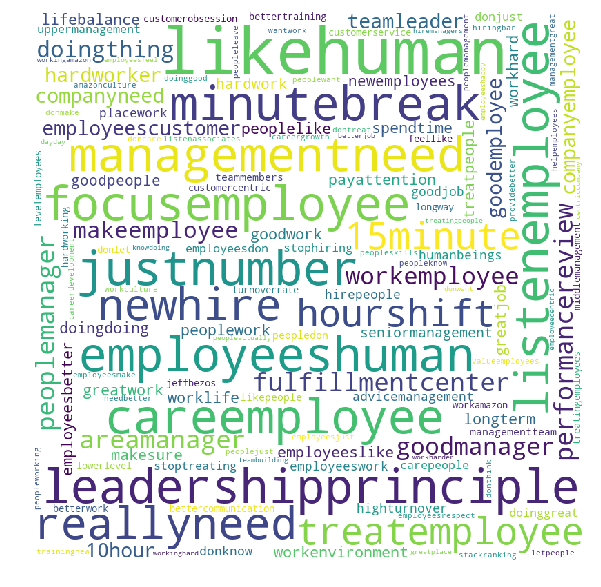

Facebook
Pros


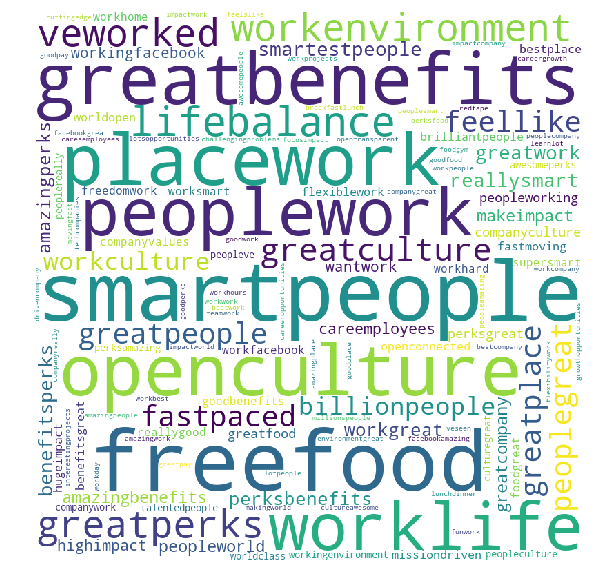

Cons


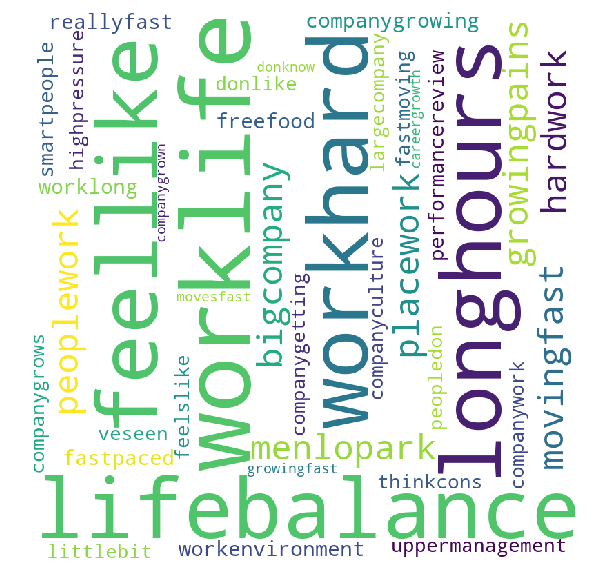

Advice to management


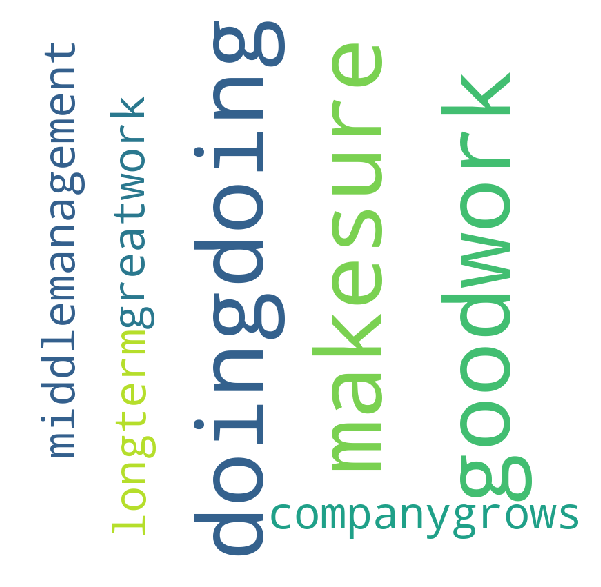

Microsoft
Pros


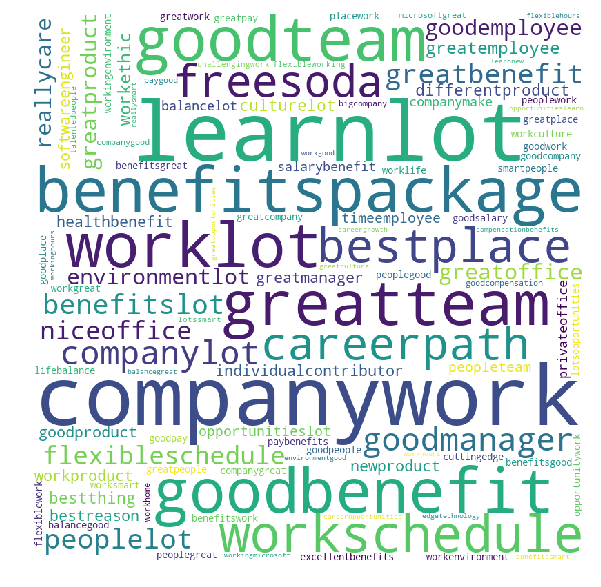

Cons


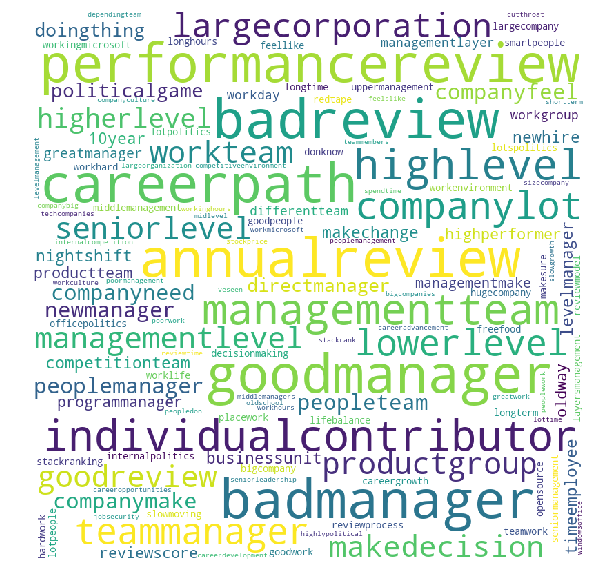

Advice to management


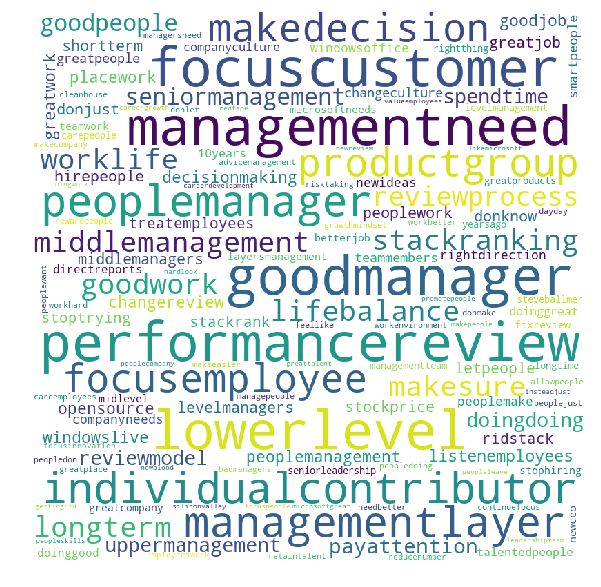

In [42]:
pros = word_chart_for_column('pros', False, ngram=(2,2))
cons = word_chart_for_column('cons', False, ngram=(2,2))
advice = word_chart_for_column('advice-to-mgmt', False, ngram=(2,2))
for company in set(data['company']):
    cmp = company.title()
    print(cmp)
    print('Pros')
    word_plot(cmp, pros)
    
    print('Cons')
    word_plot(cmp, cons)
    
    print('Advice to management')
    word_plot(cmp, advice)

### Netflix Word Clouds

The goal of the word clouds are to get an overall sentiment of a company, what areas of the company are excelling or not doing well. Netflix has an interesting "cons" word cloud becuase we can match directly the word cloud sentiment with the metrics we recieved in the study. For example, the word cloud tells us that Netflix has "high turnover", "culture fear", and "job security" most repeated. We can see in our plots from Tableau that Netflix does in fact have very low ratings for career opportunities.  

See more in Tableau Work - 6.

### Google Word Clouds

The wordplot of Google's pros from above show us the overall sentiment of the pros of the company. Google seems to have a lot of perks outside of the "work" part of work. They have "food massage", "great place", "food lot", etc. so they must have a good environment to work in.  

On the other hand, Google's "cons" wordplot shows they may struggle with management.

### Amazon Word Clouds

Amazon's "pros" wordplot describes things like "work schedule", "work day", and "work week", which might suggest it gives employees good hours.

However, their "cons" section tells a different story. We can see that there are many references to time and breaks so there might be two subsets of employees at the company. The kind who enjoy the time/work (those who put work in the pros section) and the kind who do not enjoy the time/work.

Lastly, we wanted to check out the advice to management for Amazon. We can see that in fact Amazon could do a lot of work in treating employees more like real people. An interesting observation given the fact that Amazon employees so many (556,000), and they struggle most at treating them "like human".

## Tableau Work

In [43]:
from IPython.display import HTML, display

### 1. Survey Results of Heinz Students

We asked Heinz students to choose their dream company (from the six provided in the dataset), and these are the results.

<img src='images/Survey.PNG'>

Our idea is to compare all of these companies, especially the top three chosen in the survey, across the metrics we were given.

### 2. Overall Ratings

<img src='images/Overall-Rating.PNG'>

Overall, Facebook is the highest rated, with Google close behind. Amazon is #5 on the list, even though it was in the top three choices by students.


### 2. Ratings Drivers

1. Career Opportunities
2. Compensational Benefits  
3. Cultural values  
4. Senior Management  
5. Work Life Balance 

Using these metrics, we can see how the companies compare.

<img src='images/Ratings Drivers.png'>

Facebook is better than all other companies in every category except work-life balance, except for Google, which has only a slightly higher rating. 

### 3. Former vs. Current Employees

The following compares various ratings from former and current employees. We expect that former employees will give lower ratings because people who leave a company are more likely to have grievances with the company.

#### i. Senior Management

<img src='images/Senior Former Vs Current.PNG'>

Google and Apple seem to have only a slight change in rating compared to Facebook, Netflix, and Amazon. Microsoft is in the middle. This suggests that Google and Apple do not have issues with Senior management or at least Senior management did not have much of an effect on those who left the company.

#### ii. Culture

<img src='images/Culture Former Vs Senior.png'>

Culture seems to shift least for Google and Apple, and Facebook, Amazon, and Netflix have the biggest loss in the culture metric. Google and Apple employees enjoy the culture even after leaving the company. This suggests that culture is a valuable part of each company.

### 4. Best Countries

<img src='images/Countries Map.PNG'>

### 5. Best States

<img src='images/States Map.png'>

### 6. Netflix Case Study

<img src='images/netflix cons.PNG'>

Looking at Netflix's Word Cloud for cons and their ratings by department, we can see that there is strong correlation between the words on the left and the rating for "Career" and "Management" on the right. The presence of words like "high performance" and "upper management" suggest a lower score in the respective metrics. This gives some basis for ideas of producing word clouds for each company and for each column (pros, cons, advice to management).

### 7. Comparing Locations by Company

Using Tableau, we created one more visualization to estimate the impact of location on rating.

In [44]:
display(HTML("<table><tr><td><img src='images/Facebook Order.png'></td><td><img src='images/Microsoft Order.png'></td></tr></table>"))

,


On the left we sorted the rows based on Facebook's top reviewed locations. We can see that Facebook dominates many locations in which many other companies are present.  

On the right we sorted the rows based on Microsoft's top locations. We can see that Microsoft seems to do best in places where other big tech companies have not found a site. This may suggest that Microsoft has reached out to more locations to get first choice on the best talent.

## Results

Looking specifically at the three companies that Heinz students chose as their top three companies to work for, we get the following results.

Facebook   
> -  #1 overall rating  
> -  Best over all metrics except work-life balance  
> -  Great career opportunities  

Google 
> -  #2 overall rating
> -  Common pros: “Best place” and “work environment”
> -  Best work-life balance  

Amazon 
> -  #5 overall rating
> -  Treats employees as “just a number”
> -  Not well-reviewed in US
